In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/fmezacr/DataScienceTEC/master/Clase2/titanic.csv')

In [3]:
data.shape

(891, 12)

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
cols_to_use = ['Pclass','Sex','Age','SibSp','Parch','Fare','Survived']
data = data[cols_to_use]

In [6]:
data.isnull().values.any()

True

In [7]:
data = data.dropna()

In [8]:
data.shape

(714, 7)

# Modelo de Aprendizaje Simple

In [9]:
data['Sex']=data['Sex'].replace({'male':0,'female':1})

In [10]:
features = data[['Pclass','Sex','Age','SibSp','Parch','Fare']]

In [11]:
labels = data['Survived']

In [12]:
data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,0,22.0,1,0,7.2500,0
1,1,1,38.0,1,0,71.2833,1
2,3,1,26.0,0,0,7.9250,1
3,1,1,35.0,1,0,53.1000,1
4,3,0,35.0,0,0,8.0500,0


In [13]:
features.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,0,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,3,1,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,3,0,35.0,0,0,8.0500


In [14]:
features.tail()

,Pclass,Sex,Age,SibSp,Parch,Fare
885,3,1,39.0,0,5,29.125
886,2,0,27.0,0,0,13.000
887,1,1,19.0,0,0,30.000
889,1,0,26.0,0,0,30.000
890,3,0,32.0,0,0,7.750


In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(features,labels,random_state=13)

In [17]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
DesicionTreeModel = DecisionTreeClassifier(max_depth = 5) #Máximo de profundidad #hojas puras = overfitting

In [19]:
DesicionTreeModel.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [20]:
from sklearn.metrics import accuracy_score

In [21]:
y_predict = DesicionTreeModel.predict(X_test)

In [22]:
accuracy_score(y_test, y_predict)
#0.7932960893854749 primer model

0.7988826815642458

In [23]:
from sklearn import tree
tree.export_graphviz(DesicionTreeModel, out_file='simple_tree.dot', feature_names=features.columns,impurity=False,class_names=['Not survived','Survived'],filled=True)
from subprocess import call
call(['dot', '-T', 'png', 'simple_tree.dot', '-o', 'simple_tree.png'], shell=True)

1

<img src='simple_tree.png' width = 1000px>

# Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
RandomForestModel = RandomForestClassifier(min_samples_leaf=3,min_samples_split=20,n_estimators=500,max_depth=None,random_state=10)

In [26]:
RandomForestModel.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [27]:
y_predict = RandomForestModel.predict(X_test)

In [28]:
accuracy_score(y_test, y_predict)

0.8100558659217877

In [29]:
importances = pd.DataFrame({'feature' : X_train.columns, 'importance':RandomForestModel.feature_importances_})

In [30]:
importances = importances.sort_values('importance', ascending = False).set_index('feature')

In [31]:
importances.head(9)

,importance
feature,
Sex,0.390860
Fare,0.203642
Pclass,0.170789
Age,0.167110
SibSp,0.038629
Parch,0.028971


In [32]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')

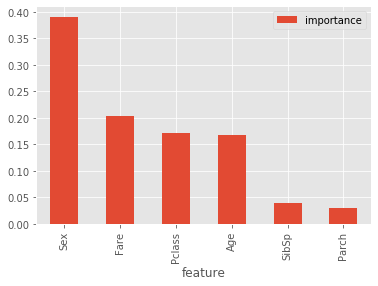

In [33]:
importances.plot.bar()

In [34]:
import torch